In [2]:
!mkdir .kaggle
!mkdir .s
import json
token = {"username":"tesla2","key":"2e88d384a9e1fa7950bfae00ad07e151"} #use your own you will find repo i explain how to connect kaggle to colab
with open("/content/.s/kaggle.json", "w") as file:
    json.dump(token, file)
!ls

mkdir: cannot create directory ‘.kaggle’: File exists
mkdir: cannot create directory ‘.s’: File exists
kaggle.json  sample_data


In [0]:
!chmod 600 /content/.s/kaggle.json

In [0]:
!cp /content/.s/kaggle.json ~/.kaggle/kaggle.json


In [7]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [8]:
!kaggle datasets download -d jessicali9530/celeba-dataset -p /content 


100% 1.21G/1.21G [00:18<00:00, 85.1MB/s]
100% 1.21G/1.21G [00:18<00:00, 69.1MB/s]


In [0]:
!unzip -qq /content/img_align_celeba.zip

In [0]:
import cv2
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt


In [42]:
x=pd.read_csv("/content/list_attr_celeba.csv")
#x['has_cactus'].hist()
x.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


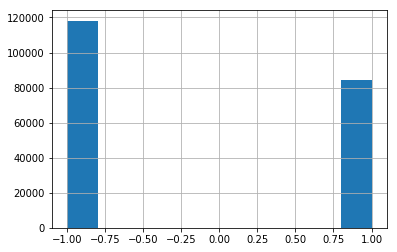

In [39]:
x['Male'].hist()


In [43]:
male=x[['image_id','Male']]
male.head()

,image_id,Male
0,000001.jpg,-1
1,000002.jpg,-1
2,000003.jpg,1
3,000004.jpg,-1
4,000005.jpg,-1


In [0]:
import seaborn as sns
y=pd.read_csv('/content/list_bbox_celeba.csv')
sns.pairplot(x, height=3);
plt.show()


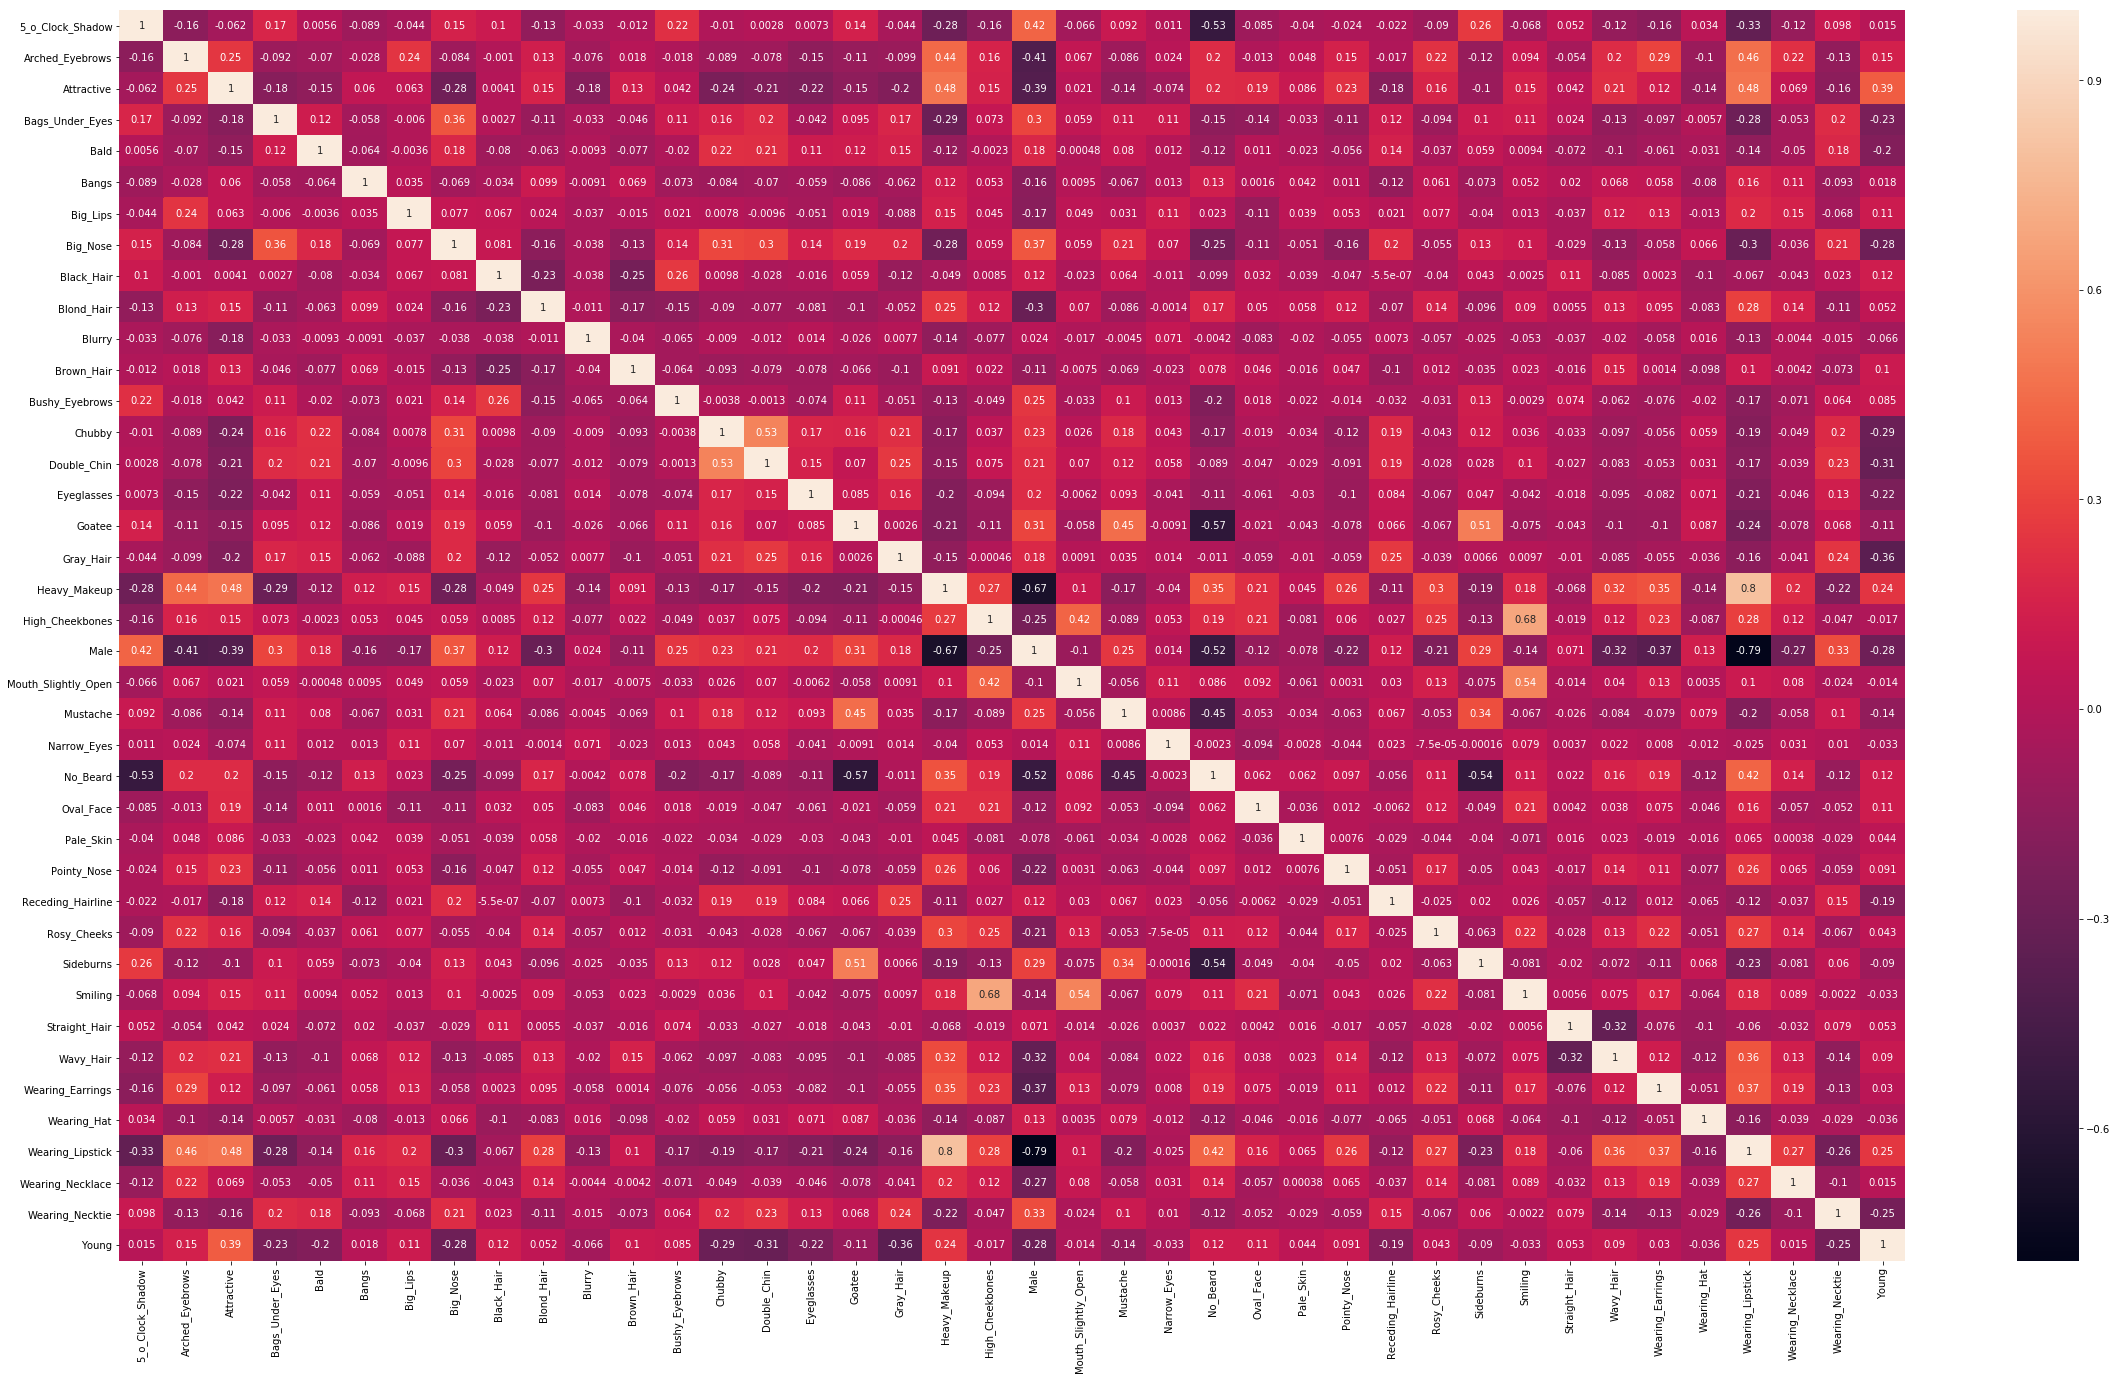

In [30]:
plt.figure(figsize=(40,23))
sns.heatmap(x.corr(), annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


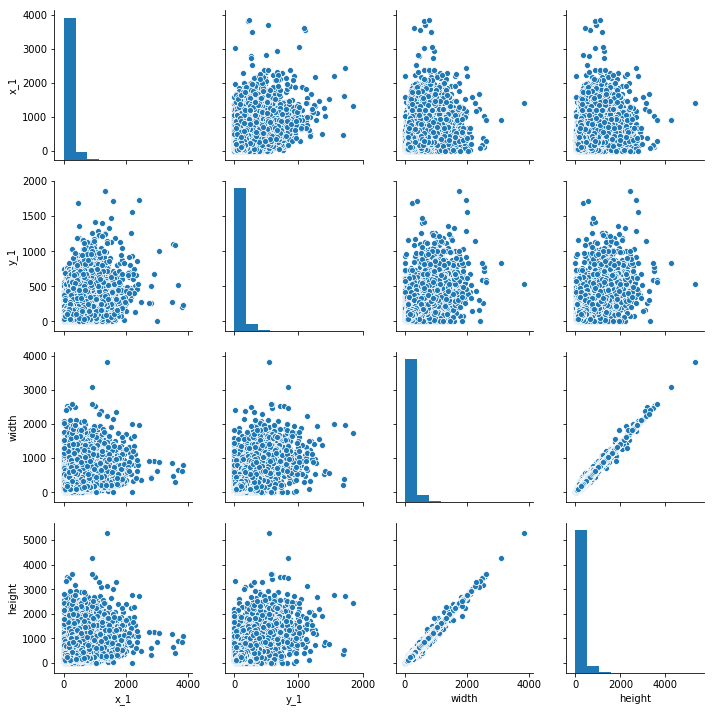

In [32]:
sns.pairplot(x, size=2.5);
plt.show()

In [0]:
from sklearn.utils import shuffle
male = shuffle(male)

In [0]:
all_images_dir='/content/train'
os.mkdir(all_images_dir)
all_images_dir='/content/train/1'
os.mkdir(all_images_dir)
all_images_dir='/content/train/-1'
os.mkdir(all_images_dir)

In [0]:
all_images_dir='/content/test'
os.mkdir(all_images_dir)
all_images_dir='/content/test/1'
os.mkdir(all_images_dir)
all_images_dir='/content/test/-1'
os.mkdir(all_images_dir)

In [0]:
n=np.asarray(male)

In [49]:
n.shape

(202599, 2)

In [56]:
n[10:20,:]

array([['147084.jpg', 1],
       ['085696.jpg', -1],
       ['046535.jpg', -1],
       ['141421.jpg', 1],
       ['154060.jpg', 1],
       ['169115.jpg', 1],
       ['154543.jpg', 1],
       ['174345.jpg', -1],
       ['036445.jpg', -1],
       ['008272.jpg', 1]], dtype=object)

In [0]:
y_train=n[0:162000,:]
y_valid=n[162000:183000,:]
y_test=n[183000:,:]

In [0]:
import os
import shutil


In [101]:
len(os.listdir('/content/train/1'))

76581

In [0]:
for i in range(162000):
    file_name=y_train[i,0]
    pos=str(y_train[i,1])
    if file_name in os.listdir('/content/img_align_celeba'):
        current0='/content/img_align_celeba/'+file_name
        direc0='/content/train/'+pos+'/'+file_name
        shutil.move(current0,direc0 )


In [0]:
for i in range(21000):
    print(i)
    file_name=y_valid[i,0]
    pos=str(y_valid[i,1])
    if file_name in os.listdir('/content/img_align_celeba'):
        current0='/content/img_align_celeba/'+file_name
        direc0='/content/test/'+pos+'/'+file_name
        shutil.move(current0,direc0 )

In [127]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(
      rescale=1./255,
#rotation_range=20,
    
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/train',
        # All images will be resized to 240*240
        target_size=(160, 160),
        batch_size=100,
        shuffle=True,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
        
        target_size=(160, 160),
        batch_size=100,
        shuffle=True,
        class_mode='binary')

Found 152001 images belonging to 2 classes.
Found 20142 images belonging to 2 classes.


In [130]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(160, 160,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 158, 158, 32)      896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 156, 156, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 78, 78, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 76, 76, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 36, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 64)        0         
__________

In [131]:
history = model.fit_generator(
      train_generator,
  steps_per_epoch=1521,
      epochs=10,
      
      validation_data=validation_generator,
      validation_steps=202)


Epoch 1/10
1521/1521 [==============================] - 333s 219ms/step - loss: 0.2031 - acc: 0.9105 - val_loss: 0.1254 - val_acc: 0.9528
Epoch 2/10
1521/1521 [==============================] - 318s 209ms/step - loss: 0.0939 - acc: 0.9643 - val_loss: 0.0753 - val_acc: 0.9728
Epoch 3/10
1521/1521 [==============================] - 315s 207ms/step - loss: 0.0788 - acc: 0.9711 - val_loss: 0.0781 - val_acc: 0.9740
Epoch 4/10
1521/1521 [==============================] - 314s 207ms/step - loss: 0.0707 - acc: 0.9742 - val_loss: 0.0633 - val_acc: 0.9773
Epoch 5/10
1521/1521 [==============================] - 313s 206ms/step - loss: 0.0650 - acc: 0.9758 - val_loss: 0.0576 - val_acc: 0.9796
Epoch 6/10
1521/1521 [==============================] - 312s 205ms/step - loss: 0.0613 - acc: 0.9782 - val_loss: 0.0551 - val_acc: 0.9820
Epoch 7/10
1521/1521 [==============================] - 312s 205ms/step - loss: 0.0566 - acc: 0.9796 - val_loss: 0.0605 - val_acc: 0.9796
Epoch 8/10
1521/1521 [============

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(160, 160, 3)
[[0.8883531]]
0
man


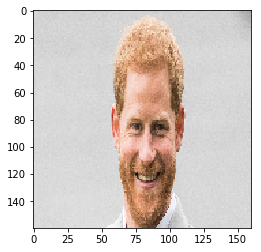

In [155]:
import numpy as np
%matplotlib inline
from keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np
img_path = "/content/prince-harry.jpg"
img = image.load_img(img_path, target_size=(160, 160))
print(type(img))
plt.imshow(img)


x = image.img_to_array(img)
x=x/255
print(type(x))
print(x.shape)
x = np.expand_dims(x, axis=0)
x=x.reshape(1,160,160,3)
#k
predictions = model.predict(x)     # Vector of probabilities
print(predictions)
print(np.argmax(predictions))
if predictions>0.5:
    print('man')
else :
    print('woman')
#5 akiec

In [0]:
model.save('gender.h5')